# <center>Understanding Worldwide COVID-19 Vaccination Progress</center>
## Table of Contents
* [1. Introduction](#introduction)
* [2. Ask](#ask)
* [3. Prepare](#prepare)
    * [3.1 Loading packages](#loading)
    * [3.2 Importing the data](#importing)   
    * [3.3 Exploring the data](#exploring)
* [4. Process](#process)
* [5. Analyze and Share](#analyze)
    * [Question 1: Which country/region has the highest vaccination rate/fully-vaccinated rate?](#q1)
    * [Question 2: How vaccination rates have changed over time?](#q2)
    * [Question 3: Which vaccine is used in the most countries/regions?](#q3)
    * [Question 4: What vaccines are used in which countries/regions?](#q4)
* [6. Conclusion](#conclusion)

## <a id="introduction">1. Introduction</a>

Coronavirus disease 2019 (COVID-19) is a contagious disease has spread worldwide and leading to the ongoing COVID-19 pandemic. Given its high mortality rate and rapid spread, an effective vaccine is urgently needed to control this epidemic.

In this project, we use the dataset `country_vaccinations.csv` from [Kaggle](https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress?datasetId=1093816&language=R&select=country_vaccinations.csv) to analyze and visualize the worldwide COVID-19 vaccination progress. Data is collected daily from the GitHub repository [covid-19](https://github.com/owid/covid-19-data) of [Our World in Data](https://ourworldindata.org/), the latest date is 2022-03-29.

The data contains the following information:

* `country`: this is the country for which the vaccination information is provided;
* `iso_code`: ISO code for the country;
* `date`: date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
* `total_vaccinations`: this is the absolute number of total immunizations in the country;
* `people_vaccinated`: a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
* `people_fully_vaccinated`: this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
* `daily_vaccinations_raw`: for a certain data entry, the number of vaccination for that date/country;
* `daily_vaccinations`: for a certain data entry, the number of vaccination for that date/country;
* `total_vaccinations_per_hundred`: ratio (in percent) between vaccination number and total population up to the date in the country;
* `people_vaccinated_per_hundred`: ratio (in percent) between population immunized and total population up to the date in the country;
* `people_fully_vaccinated_per_hundred`: ratio (in percent) between population fully immunized and total population up to the date in the country;
* `daily_vaccinations_per_million`: ratio (in ppm) between vaccination number and total population for the current date in the country;
* `vaccines`: vaccine names used in the country;
* `source_name`: source of the information (national authority, international organization, local organization etc.);
* `source_website`: website of the source of information;

## <a id="ask">2. Ask</a>

#### What is the task?
The goal of this project is to understand the following:
- Vaccination rates by country
- Vaccines used by countries

## <a id="prepare">3. Prepare</a>

### <a id="loading">3.1 Loading packages</a>

Make sure to install the following packages before loading them, here we can skip the installation as it has been done before.

In [1]:
library(tidyverse)
library(scales)
library(ggplot2)
library(ggrepel) 
library(gghighlight)
library(maps)
library(rnaturalearth)
library(rnaturalearthdata)
library(viridis) 

# make sure all columns are showing up
options(repr.matrix.max.cols = 100, repr.matrix.max.rows = 100)

# for clean output, quit the message showing the guessed column types 
options(readr.show_col_types = FALSE)

# set default theme options
theme_set(
  theme_void() + 
  theme(
    axis.title.y=element_text(angle = 90),
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold", margin = margin(0, 0, 20, 0)),
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    strip.text = element_text(size = 14)
  )
)

── Attaching packages ───────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:maps’:

    unemp


The following object is masked from ‘package:scales’:

    viridis_pal




### <a id="importing">3.2 Importing the data </a> 

In [2]:
vaccinations <- read_csv("country_vaccinations.csv")

### <a id="exploring">3.3 Exploring the data</a> 

First of all, let's check its dimensions.

In [3]:
dim(vaccinations)

[1] 86512    15

Showing the first 6 rows:

In [4]:
head(vaccinations)

country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,0,0,NA,NA,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing",World Health Organization,https://covid19.who.int/
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,1367,NA,NA,NA,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing",World Health Organization,https://covid19.who.int/
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,1367,NA,NA,NA,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing",World Health Organization,https://covid19.who.int/
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,1367,NA,NA,NA,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing",World Health Organization,https://covid19.who.int/
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,1367,NA,NA,NA,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing",World Health Organization,https://covid19.who.int/
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,1367,NA,NA,NA,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing",World Health Organization,https://covid19.who.int/


Checking the amount of missing values of each column:

In [5]:
print(colSums(is.na(vaccinations)))

                            country                            iso_code 
                                  0                                   0 
                               date                  total_vaccinations 
                                  0                               42905 
                  people_vaccinated             people_fully_vaccinated 
                              45218                               47710 
             daily_vaccinations_raw                  daily_vaccinations 
                              51150                                 299 
     total_vaccinations_per_hundred       people_vaccinated_per_hundred 
                              42905                               45218 
people_fully_vaccinated_per_hundred      daily_vaccinations_per_million 
                              47710                                 299 
                           vaccines                         source_name 
                                  0                

The country identifier `country` and `iso_code` have no missing values, which is good, otherwise we may need to fill them in.
As for other columns, those missing values are probably because some countries/regions don't report data every day. Because the value is accumulated over time, we care more about the most updated non NA values.

## <a id="process">4. Process</a>

In this section, let's manipulate the dataset to prepare for analysis and visualizations.
First of all, we need to get a summarized tibble with the most updated vaccination records, i.e, the maximum value of each column.

In [6]:
vaccinations <- vaccinations %>% 
    filter(
      !is.na(total_vaccinations),
      !is.na(people_vaccinated),
      !is.na(people_fully_vaccinated),    
      !is.na(people_vaccinated_per_hundred),
      !is.na(people_fully_vaccinated_per_hundred)
    )
  
vaccination_per_country <- vaccinations %>% 
    group_by(country) %>%
    summarise(
        total_vaccinations = max(total_vaccinations),
        people_vaccinated = max(people_vaccinated),
        people_fully_vaccinated = max(people_fully_vaccinated),
        people_vaccinated_per_hundred = max(people_vaccinated_per_hundred),
        people_fully_vaccinated_per_hundred = max(people_fully_vaccinated_per_hundred),
        vaccines = last(vaccines)
    )

Then we can merged `people_vaccinated_per_hundred` and `people_fully_vaccinated_per_hundred` into a new column `vaccination_rate`, it's more convenient to differ partly vaccinated rate from fully vaccinated rate.

In [7]:
vaccination_rates <- vaccination_per_country %>% 
  mutate(
    total_rate = people_vaccinated_per_hundred,
    fully = people_fully_vaccinated_per_hundred,
    partly = people_vaccinated_per_hundred - people_fully_vaccinated_per_hundred
  ) %>% 
  select(country, total_rate, fully, partly) %>%
  pivot_longer(
    cols = c(fully, partly),
    names_to = "rate_type",
    values_to = "value"
  ) %>% 
  mutate(rate_type = factor(rate_type, levels = c("partly", "fully")))

Next we need to separate the combination vaccine names to its own row.

In [8]:
vaccines_per_country <- vaccination_per_country %>%
  select(country, vaccines) %>% 
  separate_rows(
    vaccines,
    sep = ","
  ) %>%
  mutate(vaccines = str_trim(vaccines))

## <a id="analyze">5. Analyze and Share</a>

### <a id="q1">Question 1: Which country/region has the highest vaccination rate/fully-vaccinated rate?</a>
Let's list the top 20 countries/regions.

Warning message:
“Using `across()` in `filter()` is deprecated, use `if_any()` or `if_all()`.”


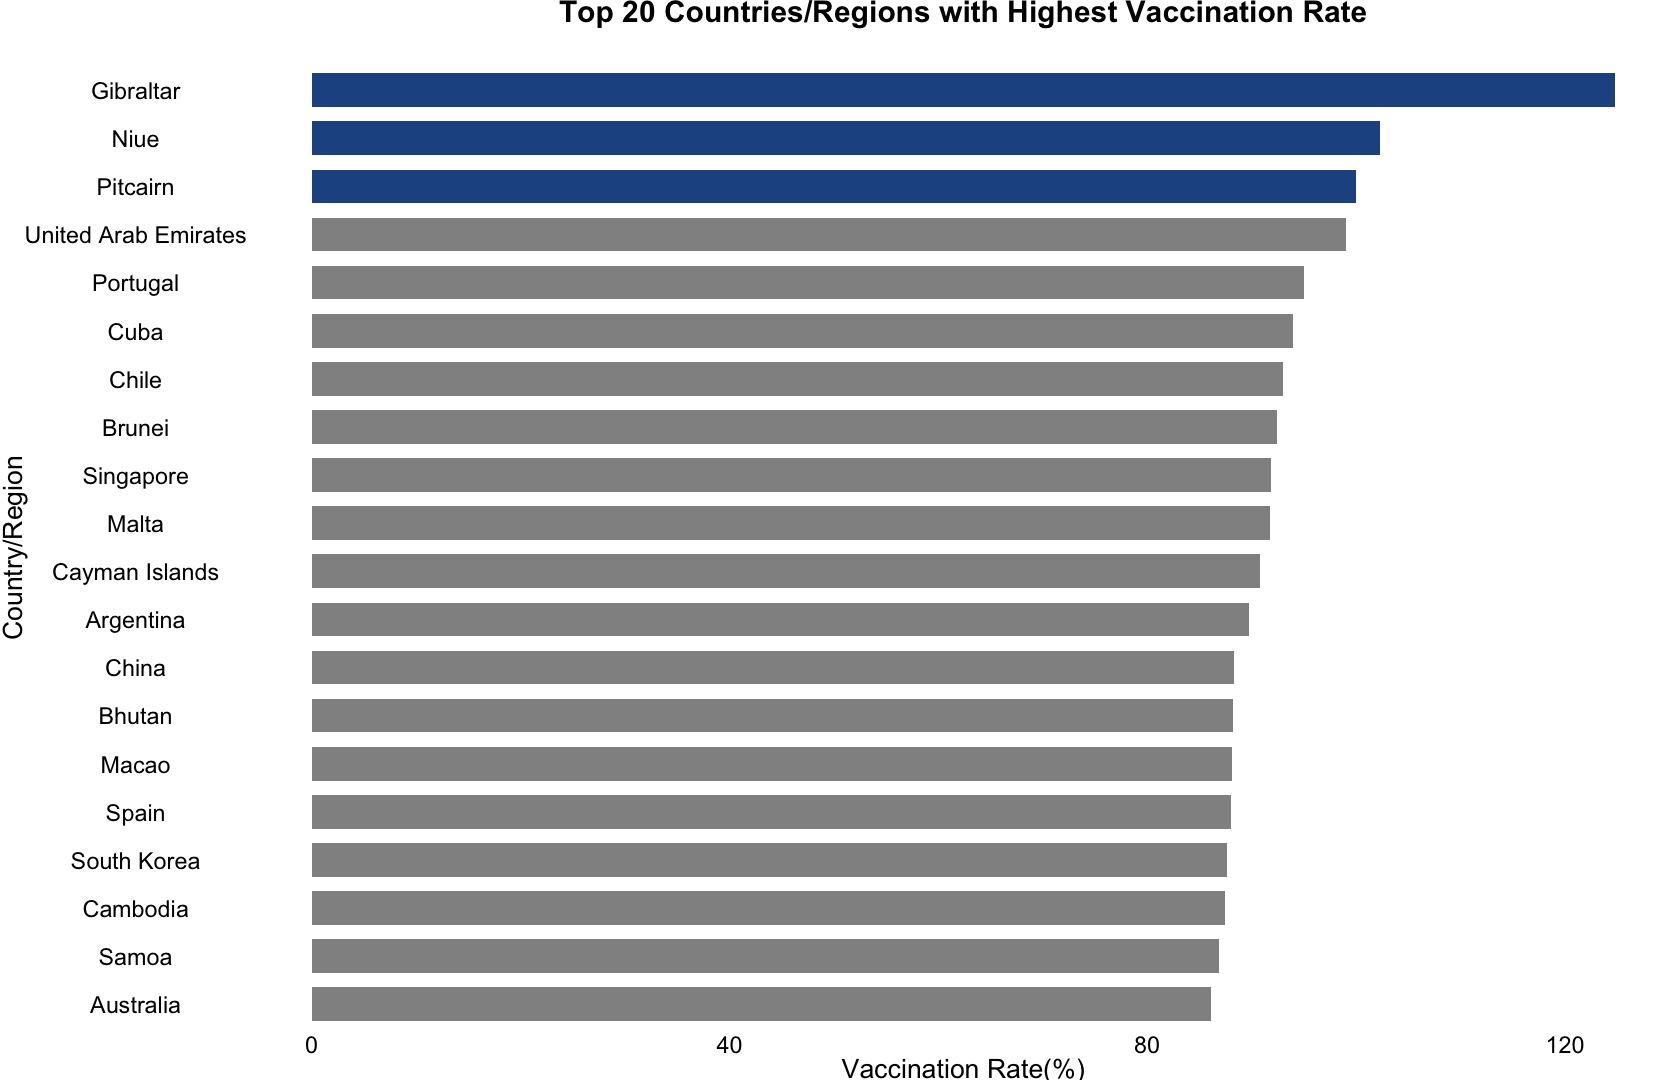

In [9]:
options(repr.plot.width = 14, repr.plot.height = 9)

vaccination_per_country %>%
  arrange(-people_vaccinated_per_hundred) %>% 
  head(20) %>% 
  ggplot(
    aes(
      x = people_vaccinated_per_hundred,
      y = reorder(country, people_vaccinated_per_hundred)
    )
  ) +
  geom_col(width = 0.7, fill = "#205493") +
  gghighlight(
    people_vaccinated_per_hundred >= 100,
    unhighlighted_params = list(fill = alpha("black", 0.5))
  ) +
  theme(legend.position = "none") +
  labs(
    title = "Top 20 Countries/Regions with Highest Vaccination Rate",
    x = "Vaccination Rate(%)",
    y = "Country/Region"
  )

Why the top 3 countries/regions have vaccination rate >= 100%? After investigating, we can find some interesting facts:

* **Gibraltar**: it's a British Overseas Territory with small population(33,691), which is around 0.05% of UK Population. Gibraltar’s entire adult population has been fully vaccinated since March, 2021, the vaccination rate larger than 100% is because of some doses were given to Spaniards who cross the border to work or visit the territory every day.
* **Niue**: it's a small island nation in the South Pacific Ocean, with population 1620.
* **Pitcairn**: it's a group of 4 volcanic islands in the South Pacific Ocean, with population 67.

So that explains why they reach such high vaccination rates, hence we think they are not as representative as other countries. We will not include them in later analysis.

Let's re-draw the above graph, this time we're going to draw a stacked barplot to show the difference between partly-vaccinated rate and fully-vaccinated rate.

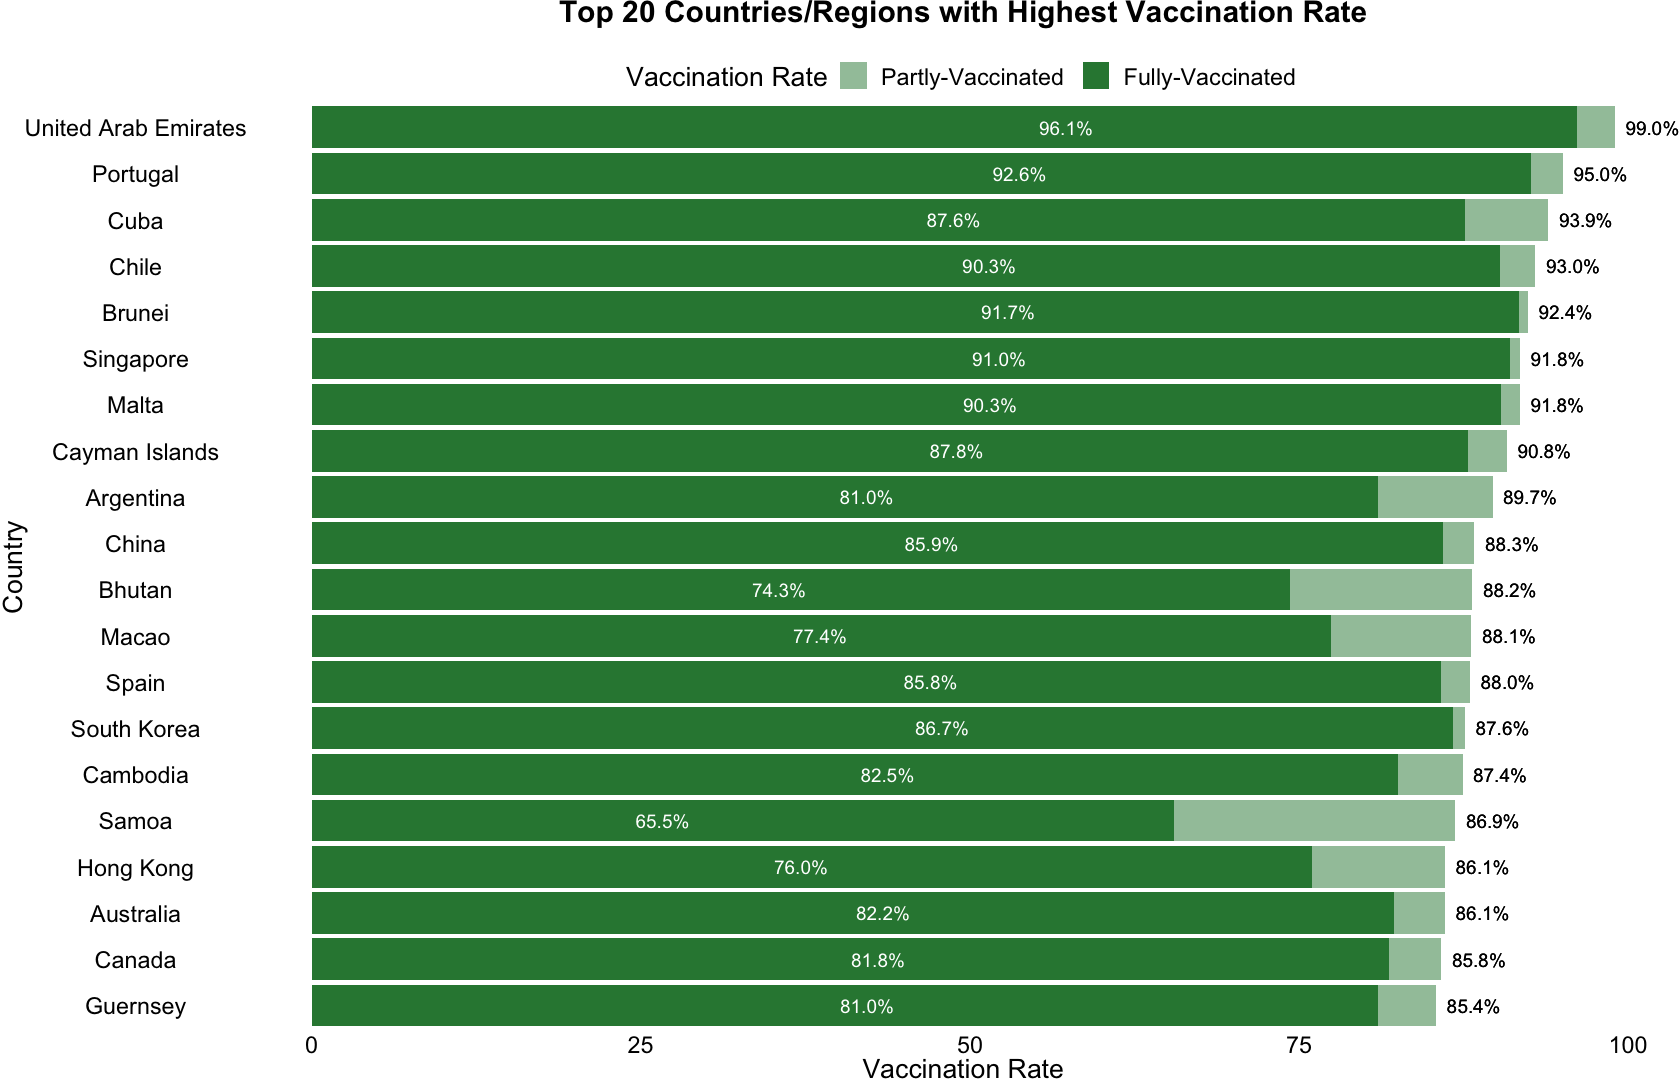

In [10]:
vaccination_rates_top <- vaccination_rates %>% 
  filter(!(country %in% c("Gibraltar", "Niue", "Pitcairn"))) %>%
  arrange(-total_rate) %>%
  head(40)

vaccination_rates_top %>%
  ggplot(aes(x = value, y = reorder(country, value, sum), fill = rate_type)) +
  geom_col() +
  geom_text(
    aes(x = value, label = label_percent(accuracy = 0.1, scale = 1)(value)),
    color = "white",
    hjust = 10,
    size = 4
  ) + 
  geom_text(
    aes(x = total_rate, label = label_percent(accuracy = 0.1, scale = 1)(total_rate)), 
    hjust = -0.2,
    size = 4
  ) +
  scale_fill_manual(
    name = "Vaccination Rate",
    values = c(alpha("#2e8540", 0.5), "#2e8540"),
    labels = c("Partly-Vaccinated", "Fully-Vaccinated")
  ) +
  theme(legend.position = "top") +
  labs(
    title = "Top 20 Countries/Regions with Highest Vaccination Rate",
    x = "Vaccination Rate",
    y = "Country"
  )

The answer to question 1:

**The United Arab Emirates** has the highest vaccination rate and fully-vaccinated rate.

Besides, we can create a world map of vaccination rate to better understand the worldwide progress.

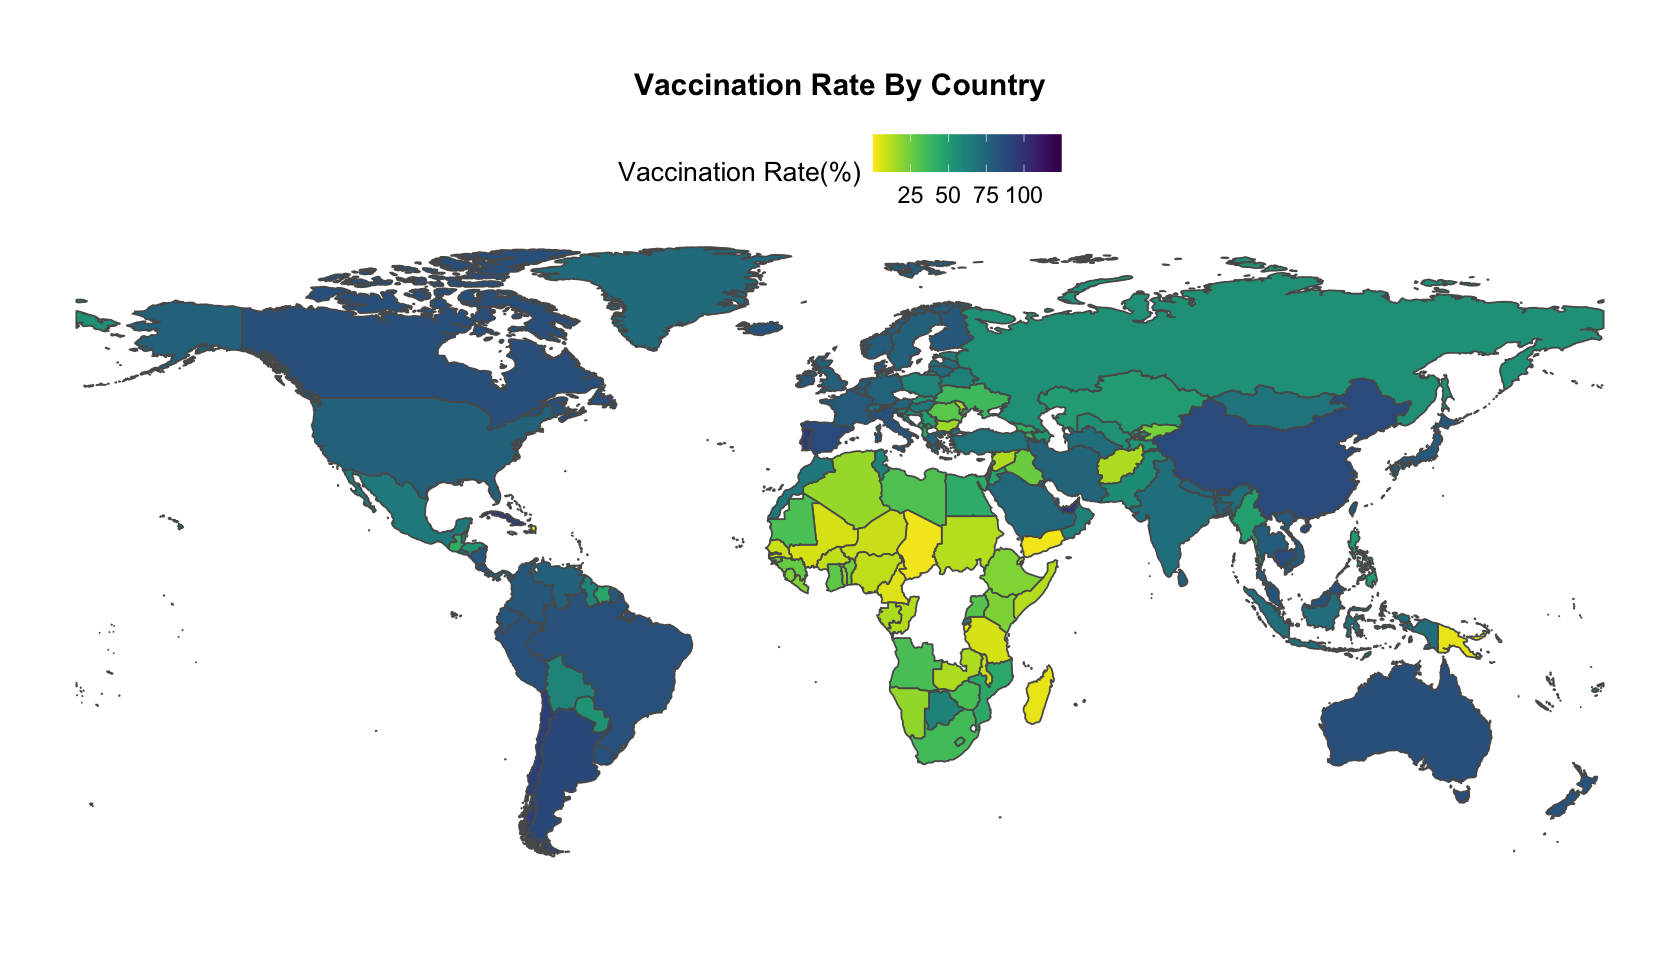

In [11]:
world <- ne_countries(scale = "medium", returnclass = "sf") %>%
  inner_join(vaccination_per_country, by = c("name" = "country")) %>% 
  select(name, geometry)

options(repr.plot.width = 14, repr.plot.height = 8)

world %>% 
  right_join(vaccination_per_country, by = c("name"="country")) %>%
  ggplot() +
  geom_sf(aes(fill = people_vaccinated_per_hundred)) +
  scale_fill_viridis(name = "Vaccination Rate(%)", direction = -1) +
  labs(title = "Vaccination Rate By Country") +
  theme(
    legend.position="top",
    axis.text.x = element_blank(), 
    axis.ticks = element_blank(),
    legend.key.size = unit(0.8, 'cm')
  )

According to the world map, the vaccination rate of African countries are low, and the vaccination rate of Russia is also lower than other developed countries.

### <a id="q2">Question 2: How vaccination rates have changed over time?</a>

#### a) Top 20 countries/regions vs. U.S.A

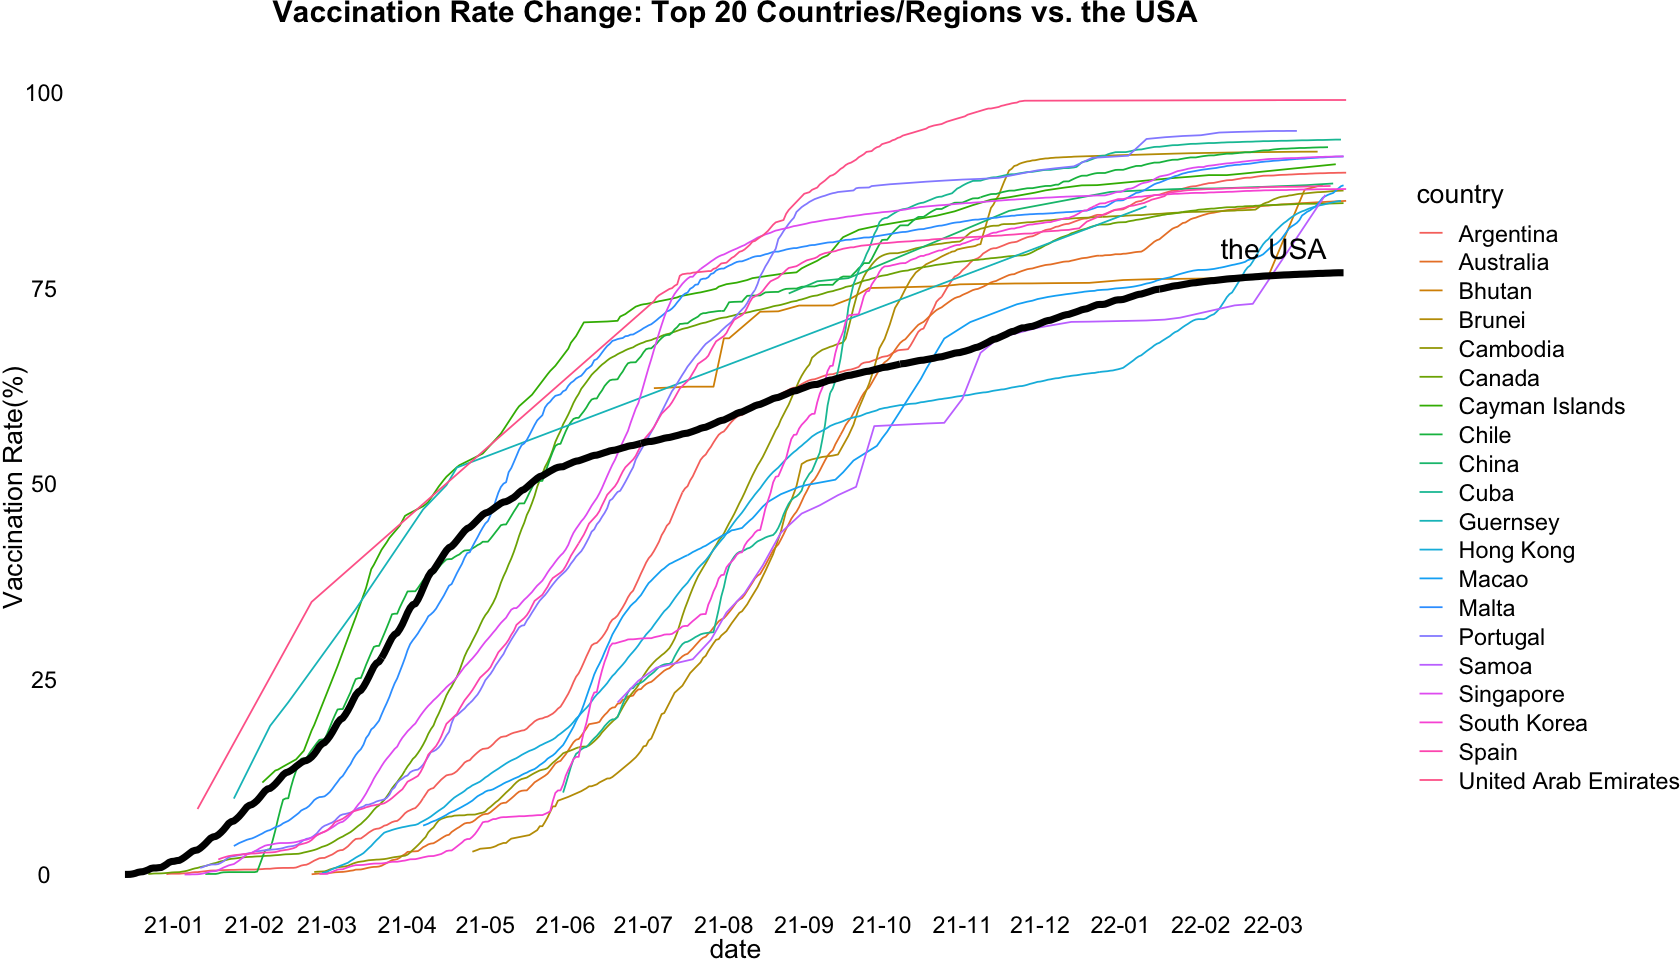

In [12]:
# Top 20 countries
top10_vaccinations <- vaccinations %>% 
  filter(country %in% head(vaccination_rates_top$country, 40))

# The USA
usa_vaccinations <- vaccinations %>% 
  filter(country == "United States")

# Date list
start_date <- as.Date("2021-01-01")
end_date <- as.Date("2022-03-29")
seq_dates <- seq.Date(start_date, end_date, by = "month")

ggplot() +
  geom_line(
    data = top10_vaccinations, 
    aes(x = date, y = people_vaccinated_per_hundred, color = country)
  ) +
  geom_line(
    size = 2,
    data = usa_vaccinations, 
    aes(x = date, y = people_vaccinated_per_hundred), color = "black"
  ) +
  geom_text(
    data = usa_vaccinations, 
    aes(
      label = ifelse(country =="United States" & date == as.Date("2022-03-28"), "the USA", ""), 
      x = as.Date("2022-03-01"), 
      y = 80
    ),
    size = 6
  ) +
  scale_x_date(date_labels="%y-%m", breaks = seq_dates) +
  labs(title = "Vaccination Rate Change: Top 20 Countries/Regions vs. the USA", y = "Vaccination Rate(%)")

According to above plot, the vaccination process of USA started early but didn't grow fast until 2021-03. Its vaccination rate increased rapidly from 2021-03 to 2021-05, in that period it reached 4rd highest vaccination rate. However since then it got very slow growth. While the other countries/regions, no matter started the process early or late, their rapid growing periods were longer, so just 2 months later, the USA's ranking dropped to about 12th. What caused the slow growth after May, 2021? We won't know the answer from the dataset, it needs further investigation.

#### b) African countries

As we've noticed in Question 1's world map, the vaccination rates in Africa countries are lower than other areas.
Let's check their change over time:

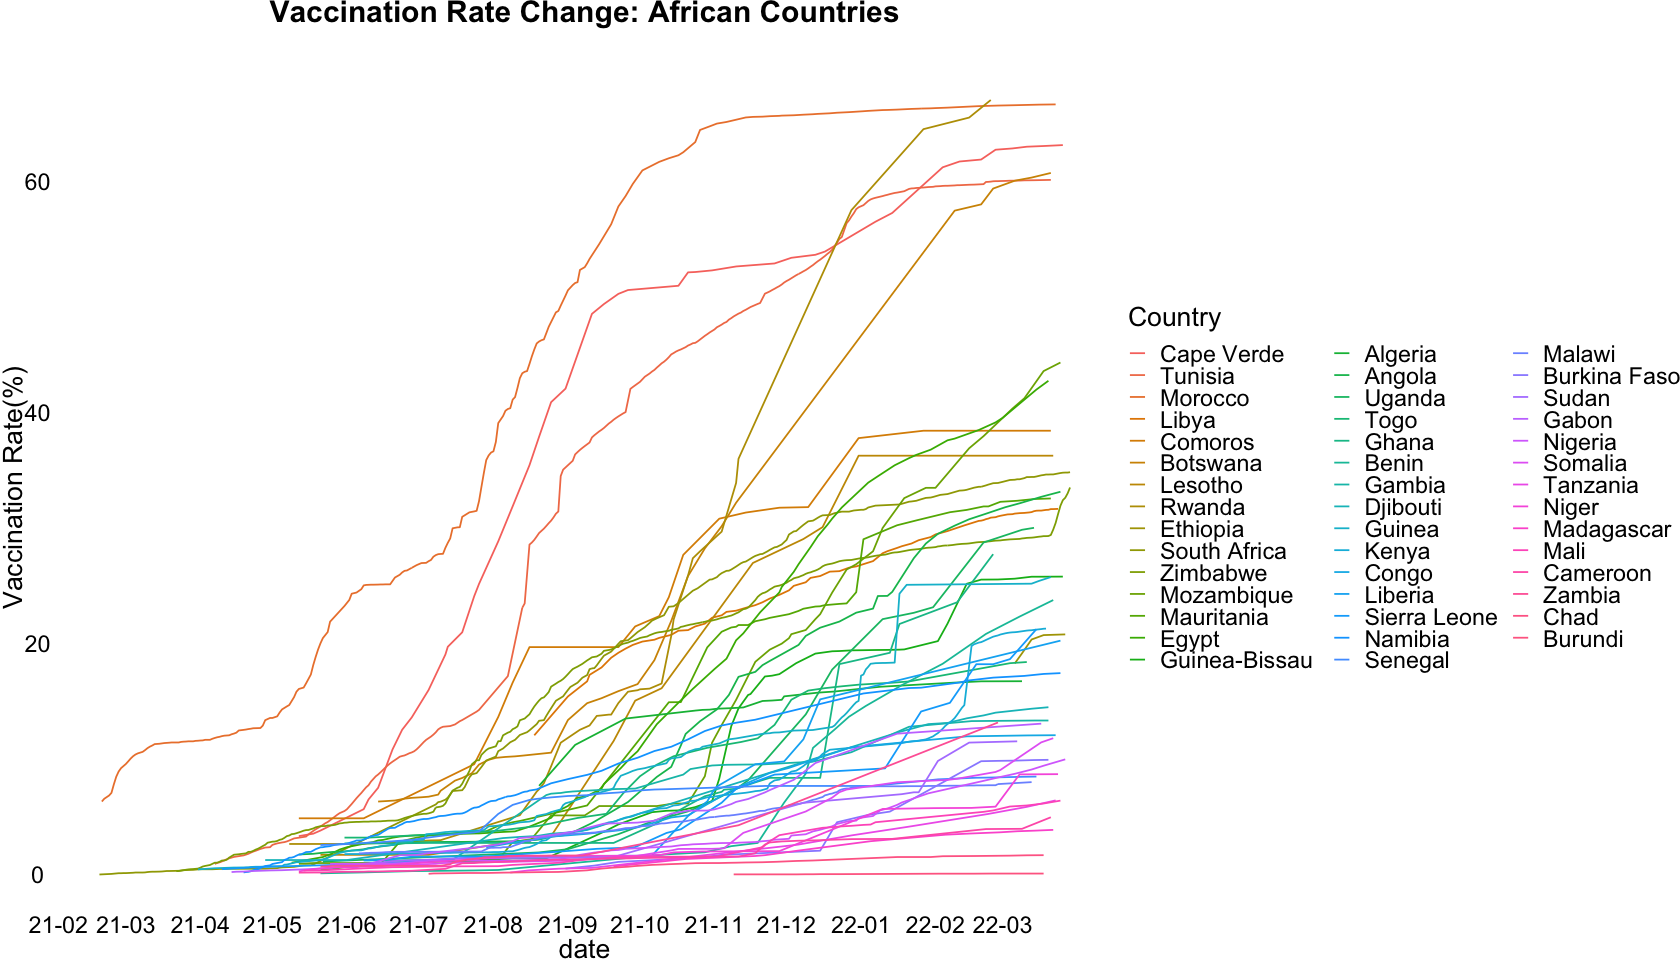

In [13]:
# African countries
africa <- ne_countries(scale = "medium", continent = 'africa', returnclass = "sf") %>%
  select(name, geometry)

africa_vaccinations <- vaccinations %>% 
  filter(country %in% africa$name)

ggplot() +
  geom_line(data = africa_vaccinations, aes(x = date, y = people_vaccinated_per_hundred, color = reorder(country, -people_vaccinated_per_hundred))) +
  scale_x_date(date_labels="%y-%m", breaks = seq_dates) +
  labs(
    title = "Vaccination Rate Change: African Countries", 
    y = "Vaccination Rate(%)", 
    color = "Country"
  ) +
  theme(legend.key.size = unit(0.4, 'cm'))

Most African countries started the vaccination process as late as 2021-05, and many of them are still increasing at a constant rate, we have reason to believe that vaccination rates will be higher in a few months.

### <a id="q3">Question 3: Which vaccine is used in the most countries/regions?</a>

Warning message:
“Using `across()` in `filter()` is deprecated, use `if_any()` or `if_all()`.”
Warning message:
“Using `across()` in `filter()` is deprecated, use `if_any()` or `if_all()`.”


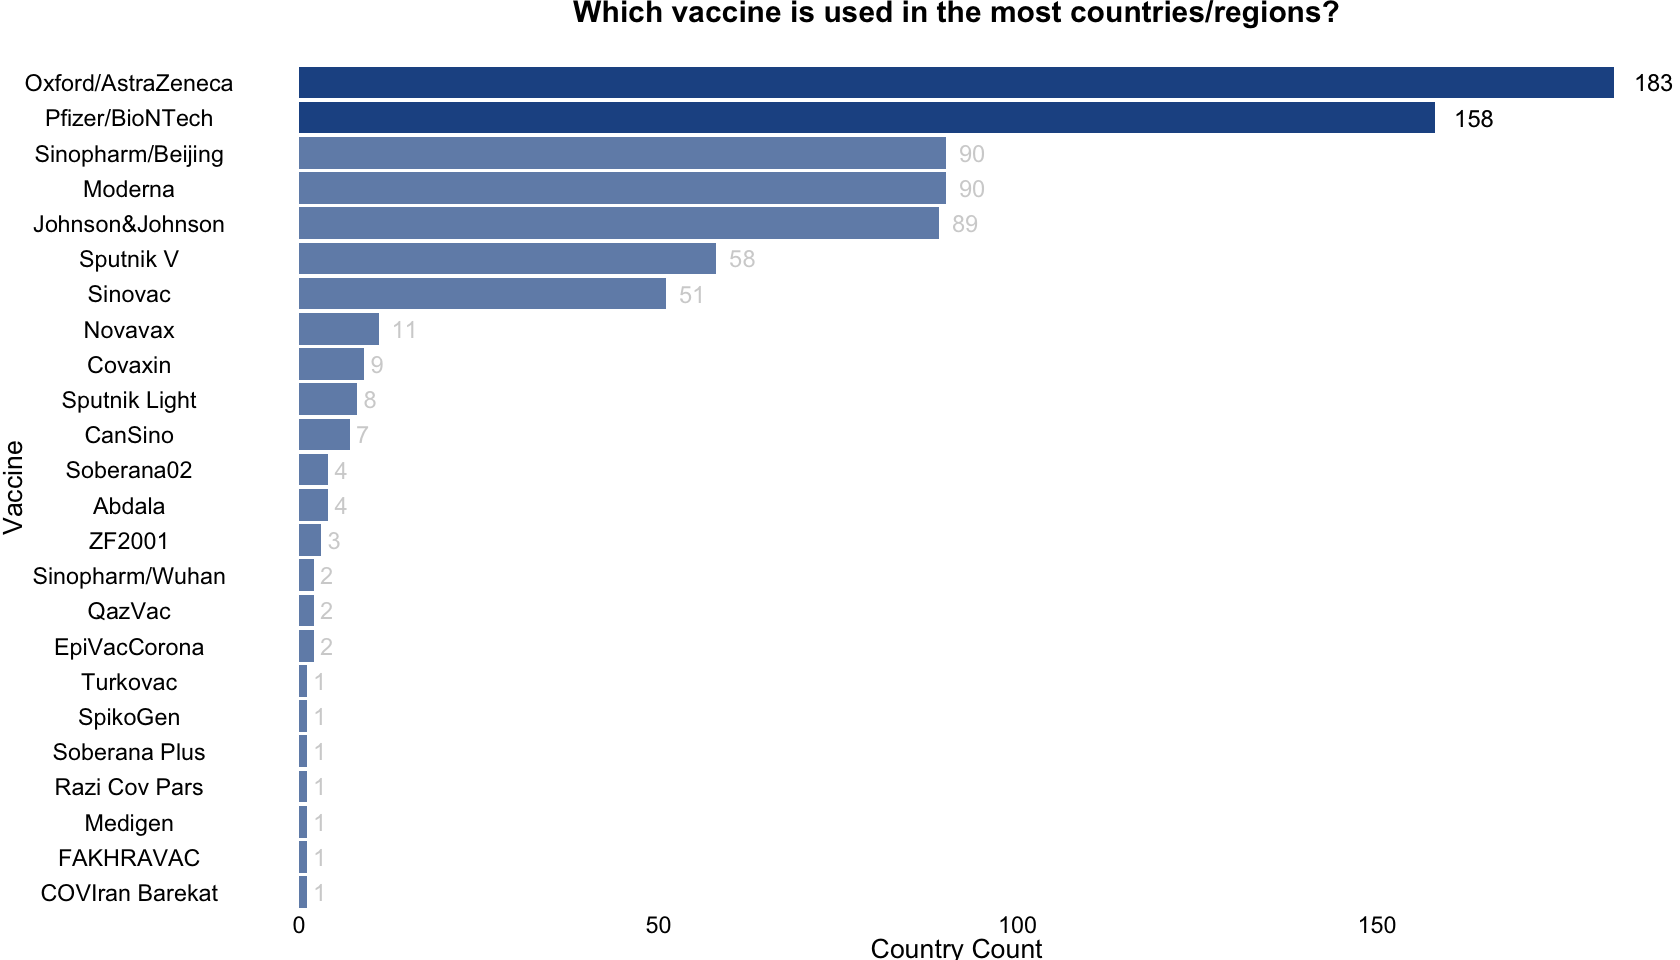

In [14]:
# most used vaccine
vaccines_count <- vaccines_per_country %>%
  group_by(vaccines) %>% 
  summarise(count = n())

vaccines_count %>% 
  ggplot(aes(x = count, y = reorder(vaccines, count))) +
  geom_col(fill = "#205493") +
  geom_text(aes(label = count), hjust = -0.5, size = 5) +
  gghighlight(count >= 195/2, unhighlighted_params = list(fill = alpha("#205493", 0.7))) +
  labs(
    title = "Which vaccine is used in the most countries/regions?", 
    x = "Country Count", 
    y = "Vaccine"
  )

The answer to question 3:

**Oxford/AstraZeneca** and **Pfizer/BioNTech** are used in more than half countries/regions (there are 195 countries in the world), and Oxford/AstraZeneca is most widely used, as many as 183 countries/regions.

### <a id="q4">Question 4: What vaccines are used in which countries/regions?</a>

We've known most countries/regions use more than 1 vaccine, which makes it hard to for us to understand how vaccine varies in countries/regions, by using one world map only. Here we split the question to 2 sub-questions.

#### a) Which countries/regions use the most widely used vaccines (Pfizer/BioNTech, Oxford/AstraZeneca)?

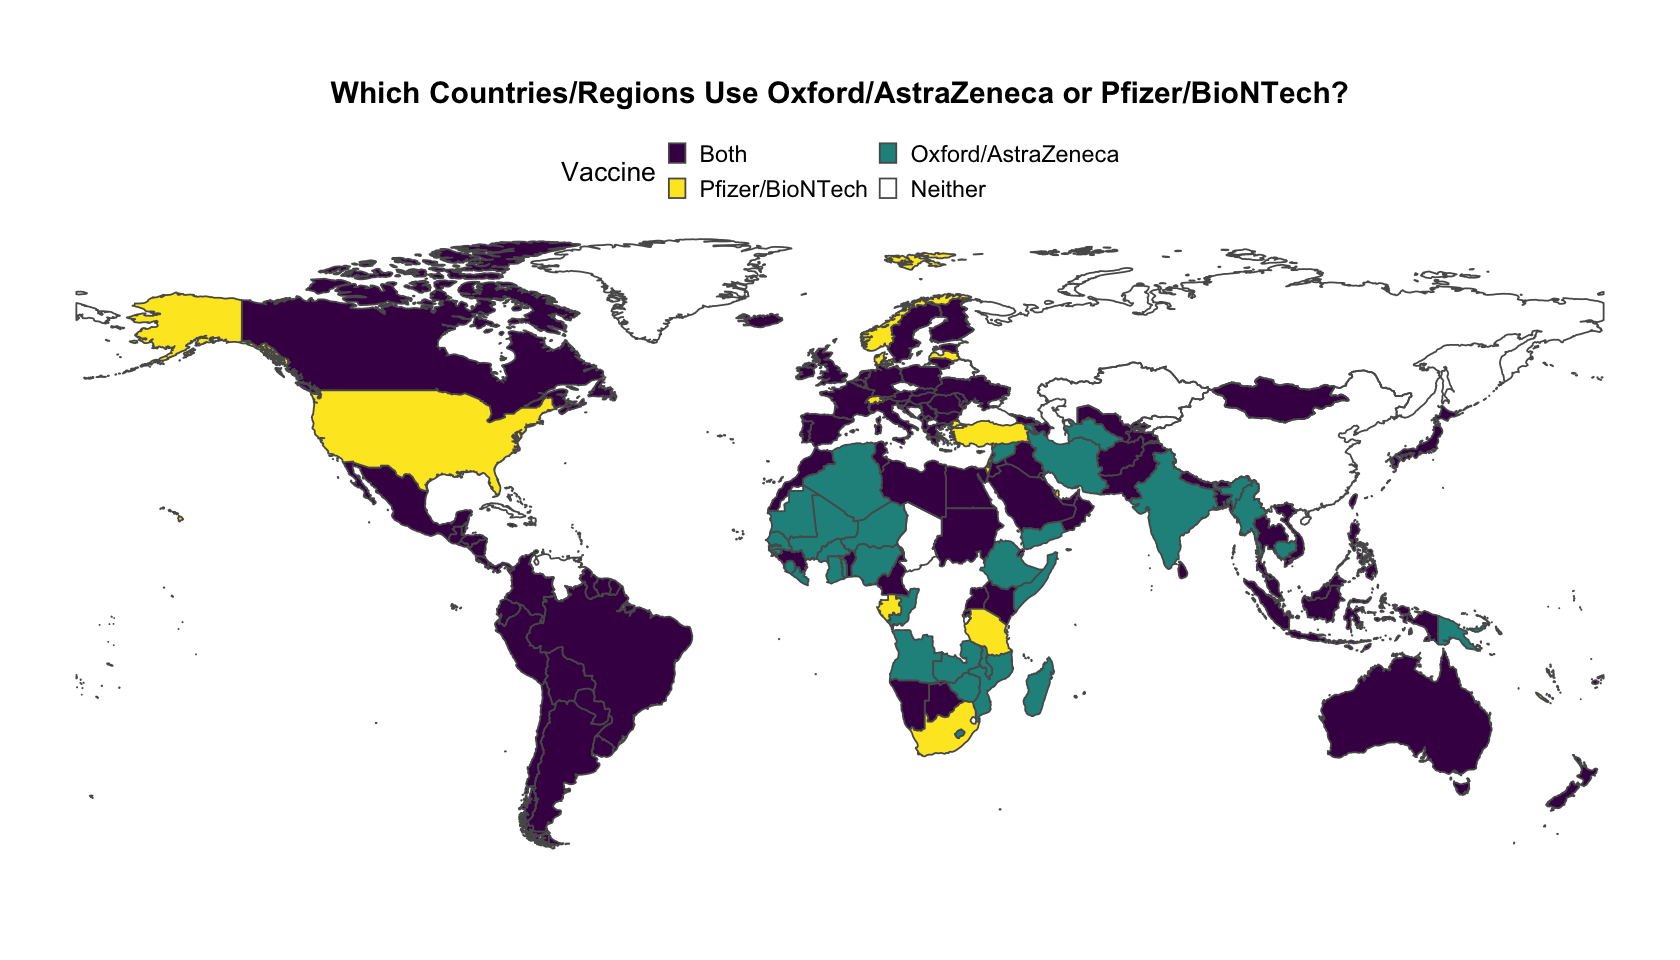

In [15]:
top_vaccines_countries <- vaccines_per_country %>%
  group_by(country) %>% 
  summarise(
    count_o = sum(str_detect(vaccines, "Oxford/AstraZeneca")),
    count_p = sum(str_detect(vaccines, "Pfizer/BioNTech")),
  ) %>% 
  mutate(
    top_vaccine = case_when(
      (count_p == 1 & count_o == 1) ~ "Both",
      count_o == 1 ~ "Oxford/AstraZeneca",
      count_p == 1 ~ "Pfizer/BioNTech"
    )
  ) %>% 
  select(country, top_vaccine)

world %>% 
  left_join(top_vaccines_countries, by = c("name" = "country")) %>%
  ggplot() +
  geom_sf(aes(fill = top_vaccine)) +
  scale_fill_viridis_d(name = "Vaccine", labels = c("Both", "Oxford/AstraZeneca", "Pfizer/BioNTech", "Neither")) +
  labs(title = "Which Countries/Regions Use Oxford/AstraZeneca or Pfizer/BioNTech?") +
  theme(
    legend.position = "top",
    axis.text.x = element_blank(), 
    axis.ticks = element_blank(),
    legend.key.size = unit(0.4, 'cm')
  ) +
  guides(fill = guide_legend(nrow = 2, byrow = TRUE))

According to above map, Pfizer/BioNTech and Oxford/AstraZeneca are used worldwide, America countries (notice the USA uses Pfizer/BioNTech only), Europe, Australia, etc. use both of them.
However China, Russia and some African countries use neither of them. 

#### b) Which countries/regions use vaccines other than Oxford/AstraZeneca and Pfizer/BioNTech？

Let's visualize it by another world map:

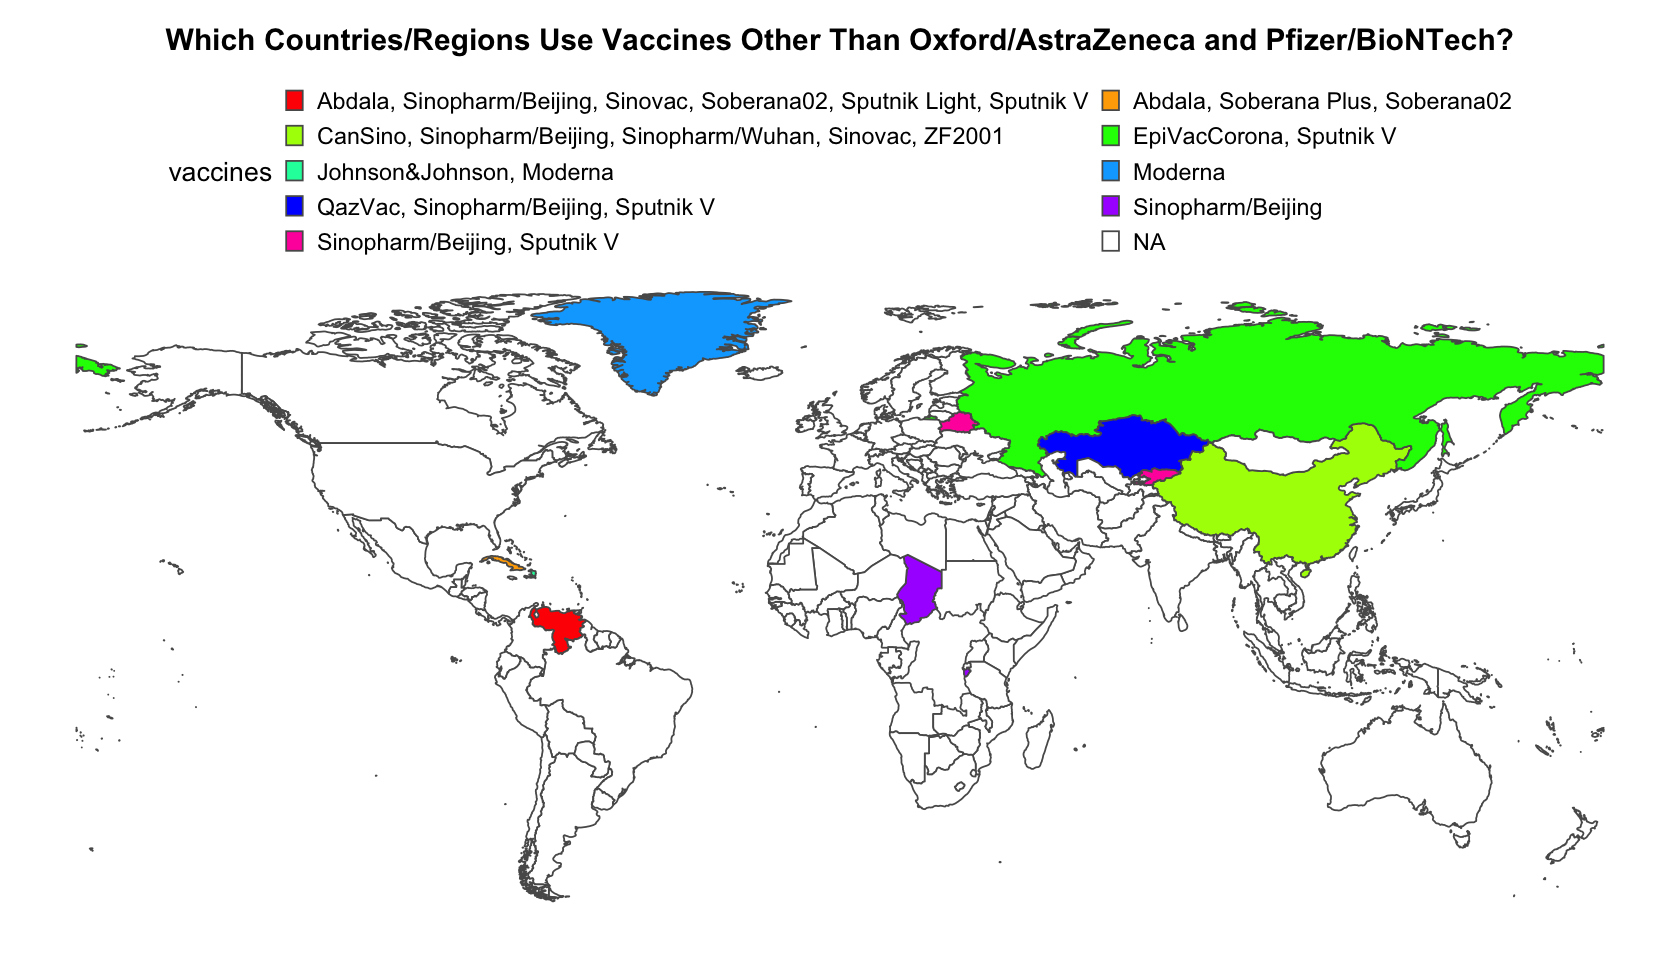

In [16]:
non_top_vaccine_countries <- vaccination_per_country %>% 
  filter(!str_detect(vaccines, "Pfizer") & !str_detect(vaccines, "Oxford")) %>% 
  select(country, vaccines)

world %>% 
  left_join(non_top_vaccine_countries, by = c("name" = "country")) %>%
  ggplot() +
  geom_sf(aes(fill = vaccines)) +
  scale_fill_manual(values = rainbow(9), na.value = "white") +
#   scale_fill_viridis_d(option = "plasma", name = "Vaccine") +
  labs(title = "Which Countries/Regions Use Vaccines Other Than Oxford/AstraZeneca and Pfizer/BioNTech?") +
  theme(
    legend.position = "top",
    axis.text.x = element_blank(), 
    axis.ticks = element_blank(),
    legend.key.size = unit(0.4, 'cm')
  ) +
  guides(fill = guide_legend(nrow = 5, byrow = TRUE))

According to above world map, those countries/regions still use vaccines that relatively widely approved worldwide, for example, Sinopharm/Beijing, Modera, Johnson&Johnson, Sputnik V are ranking 3rd, 4th, 5th and 6th in the Question 3's vaccine list. It's worth to mention that Cuba only use its own vaccines (Abdala, Soberana Plus, Soberana02), but unlike China and Russia, its vaccines are not that widely available, there are only 4 countries/regions use Abdala and Soberana02, while only Cuba itself uses Soberana Plus.

## <a id="conclusion">6. Conclusion</a>

* The United Arab Emirates has both the highest vaccination rate and fully-vaccinated rate.
  Africa has lower vaccination rate than other continents.

* The vaccination rate of USA is not among the top 20. It started the vaccination process early but the rapid rise period was too short, now it begins to flatten out.

* African countries started the vaccination process late but the vaccination rates of most of them are still rising. 

* The 2 most used vaccines are Oxford/AstraZeneca and Pfizer/BioNTech, being used in 183 and 158 countries/regions, respectively.

* China, Russia and Cuba use their own vaccines. China and Russia are the third and sixth most widely used vaccines, but only four countries use Cuban vaccines. 